# Netflix stock price prediction

               - Thulasi Gabbita(NU01134)

### Importing required modules

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

### Loading the Dataset

In [2]:
df = pd.read_csv('NFLX.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


### Exploring the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


### Data Cleaning, Analysis, and EDA

In [7]:
df['Formated Date']=pd.to_datetime(df['Date'])

In [8]:
df.set_index('Date',inplace=True)

In [9]:
df

,Open,High,Low,Close,Adj Close,Volume,Formated Date
Date,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018-02-05
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018-02-06
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018-02-07
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018-02-08
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018-02-09
...,...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,2022-01-31
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,2022-02-01
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2022-02-02


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Open           1009 non-null   float64       
 1   High           1009 non-null   float64       
 2   Low            1009 non-null   float64       
 3   Close          1009 non-null   float64       
 4   Adj Close      1009 non-null   float64       
 5   Volume         1009 non-null   int64         
 6   Formated Date  1009 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 63.1+ KB


#### Plotting all price values 

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

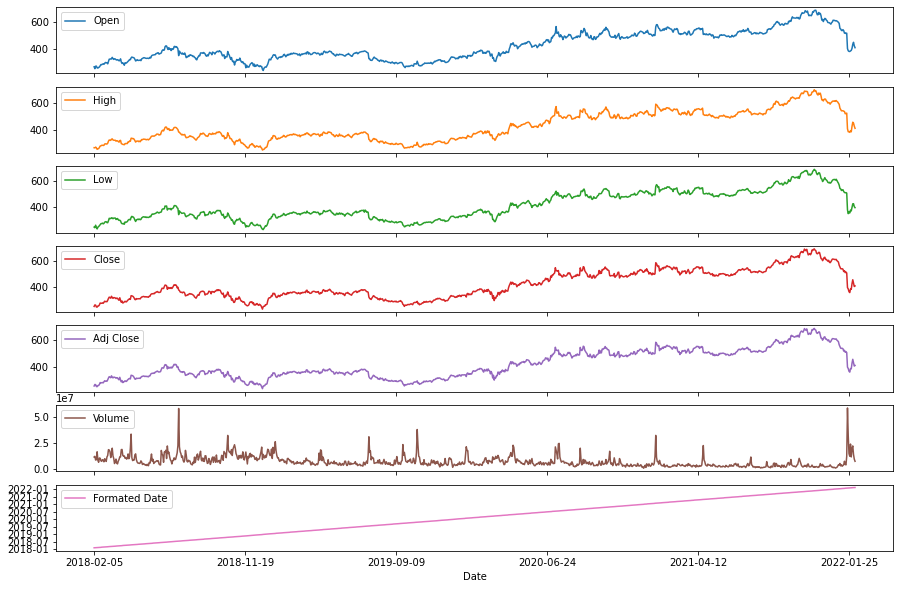

In [11]:
df.plot(subplots=True, figsize=(15,10))

#### Distribution of "Close" price 

<AxesSubplot:title={'center':'Distribution of "Close" price'}, xlabel='Close', ylabel='Count'>

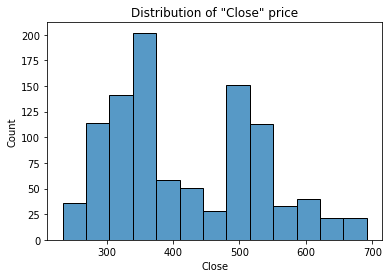

In [12]:
plt.title('Distribution of "Close" price')
sns.histplot(df['Close'],)

#### Variation in "Close" price over 5 years

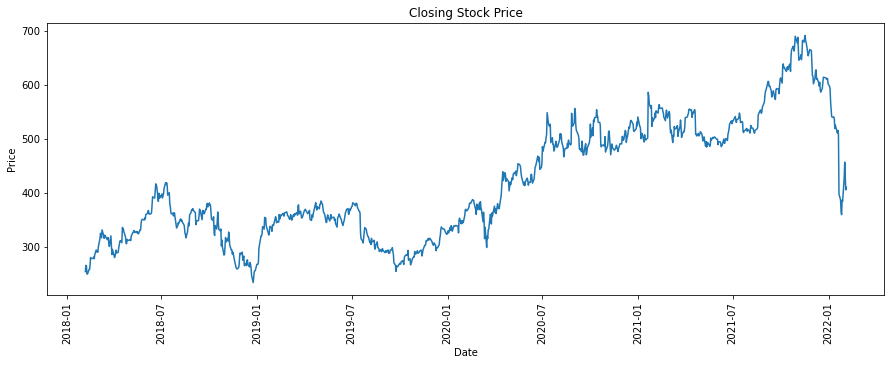

In [14]:
plt.figure(figsize=(15,5))
plt.title('Closing Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.plot(df['Formated Date'], df.Close)
plt.show()

#### Calculating Daily returns 

In [15]:
df['Daily Returns'] = df['Adj Close'].pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,Formated Date,Daily Returns
Date,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018-02-05,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018-02-06,0.045072
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018-02-07,-0.004366
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018-02-08,-0.054657
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018-02-09,-0.002519
...,...,...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,2022-01-31,0.111302
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,2022-02-01,0.070211
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2022-02-02,-0.060486


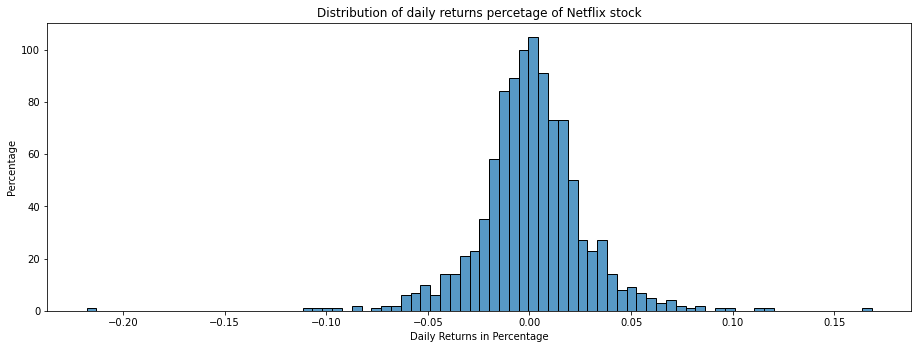

In [16]:
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sns.histplot(data=df['Daily Returns'],bins=80)
ax1.set_xlabel('Daily Returns in Percentage')
ax1.set_ylabel('Percentage')
ax1.set_title("Distribution of daily returns percetage of Netflix stock")
plt.show()

Text(0.5, 1.0, 'Daily returns for the Netflix stock between 02/05/18 to 02/04/22')

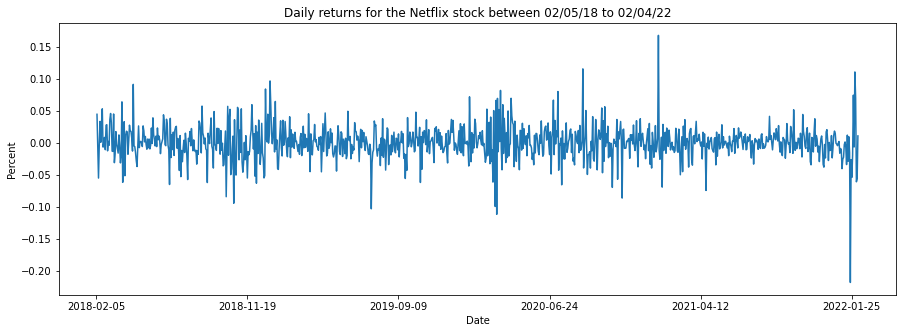

In [17]:
plt.figure(figsize=(15,5))
df['Daily Returns'].plot()
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Daily returns for the Netflix stock between 02/05/18 to 02/04/22')

#### Calculating cumulative returns over 5 years

In [18]:
df['Cumulative Returns'] =  (df['Daily Returns']+1).cumprod()
df

,Open,High,Low,Close,Adj Close,Volume,Formated Date,Daily Returns,Cumulative Returns
Date,,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018-02-05,NaN,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018-02-06,0.045072,1.045072
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018-02-07,-0.004366,1.040510
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018-02-08,-0.054657,0.983639
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018-02-09,-0.002519,0.981161
...,...,...,...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,2022-01-31,0.111302,1.679934
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,2022-02-01,0.070211,1.797884
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2022-02-02,-0.060486,1.689137


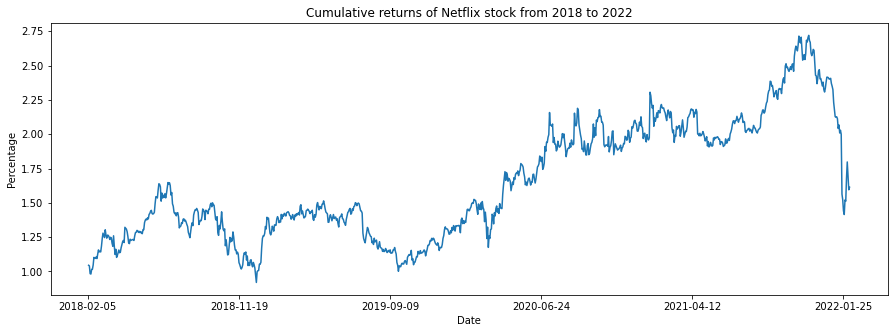

In [19]:
plt.figure(figsize=(15,5))
df['Cumulative Returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.title('Cumulative returns of Netflix stock from 2018 to 2022')
plt.show()


#### Plot comparision of Closing price and moving average

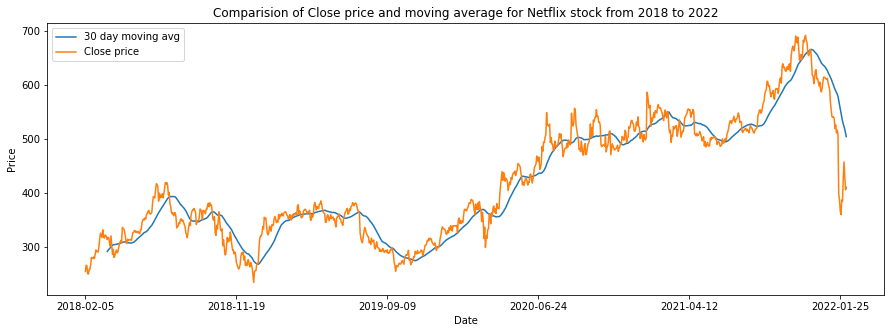

In [20]:
plt.figure(figsize=(15,5))
df['Close'].rolling(window=30).mean().plot(label='30 day moving avg')
df['Close'].plot(label='Close price')
plt.title('Comparision of Close price and moving average for Netflix stock from 2018 to 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

### Train and Test split

In [28]:
X = df[['Open','High','Low','Volume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 40)
print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 807
Test samples: 202


In [41]:
#Feature Scaling
scaler = StandardScaler().fit_transform(X_train)

#### Linear Regression

In [42]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression model Mean Squared Error : {mse_lr}')

Linear Regression model Mean Squared Error : 17.267705628875582


#### Random Forest model

In [52]:
rf_model = RandomForestRegressor(n_estimators=300, random_state = 100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Regression model Mean Squared Error : {mse_rf}')

Random Forest Regression model Mean Squared Error : 30.13218133289596
